## Conceptual

**1. Using basic statistical properties of the variance, as well as single- variable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1 − α)Y ).**

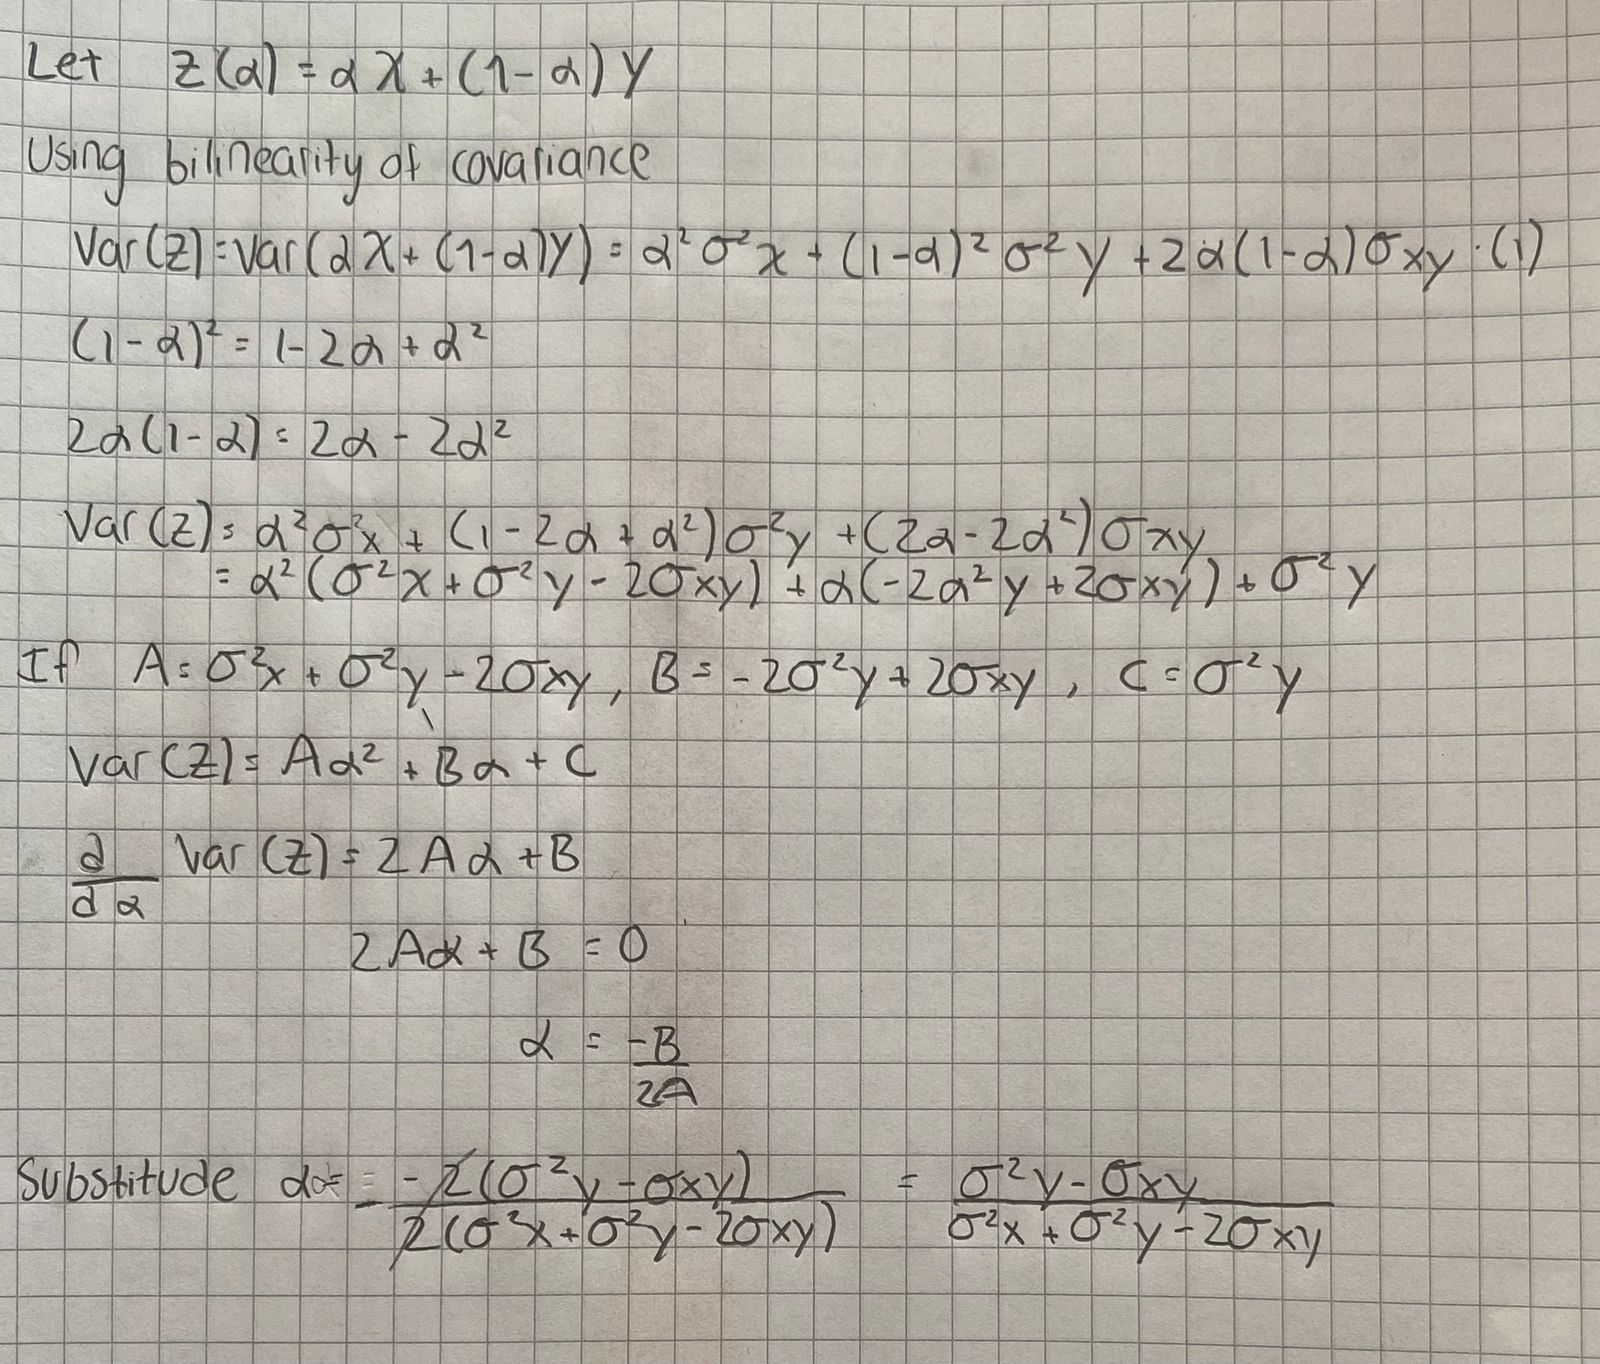

**2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.**


**(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.**

A bootstrap sample picks one observation from the n observations because each observation has probability 1/n of being selected, and we exclude one.

P(first draw is not j)= 1 − 1/n 

**(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?**

Same idea as (a). Sampling is independent with replacement

P(second draw is not j)= 1 − 1/n

**(c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n**

A bootstrap sample has n independent draws. Each draw misses observation j with probability 1 −1 / n

P(j not selected in any of the n draws)= ( 1 − 1 / n )^2

**(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?**

P(included) = 1− ( 1 − 1/5 )^5 = 1 − ( 4/5 )^5

(4/5)^5 = 0.32768

P(included) = 1 - 0.32768 = 0.67232

**(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?**

P(included) = 1− ( 1 − 1/100 )^100 ≈ 1 − (e^−1) ≈ 1 − 0.36603 = 0.6339

**(f) When n = 10, 000, what is the probability that the jth observa- tion is in the bootstrap sample?**

P(included) = 1− ( 1 − 1/10,000 )^10,000 ≈ 1 − (e^−1)≈ 1 − 0.3679 = 0.6321

**(g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.**

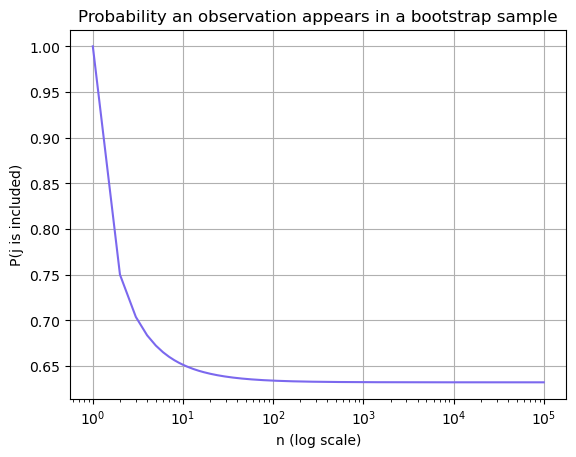

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.arange(1, 100001)
prob_included = 1 - (1 - 1/n_values)**n_values

plt.plot(n_values, prob_included, color = "mediumslateblue")
plt.xscale("log")
plt.xlabel("n (log scale)")
plt.ylabel("P(j is included)")
plt.title("Probability an observation appears in a bootstrap sample")
plt.grid(True)
plt.show()

**(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.**

In [2]:
n = 100
j = 4
B = 10000  

included = []

for b in range(B):
    sample = np.random.choice(np.arange(1, n+1), size=n, replace=True)
    included.append(j in sample)

included = np.array(included)
print("prob:", included.mean())

prob: 0.6322


**Comment on the results obtained.**

El resultado obtenido es muy parecido con la teoría y en la practica. En la teoría, 1 − (e^−1) = 0.6321, mientras que en la practica, igual simulando un bootstap 10,000 se obtiene 0.6385

Esto nos dice que conforme la B va aumentando, la probabilidad si converge a este valor.

**3. We now review k-fold cross-validation.**


**(a) Explain how k-fold cross-validation is implemented.**

Lo que hace un K-fold cross-validation es dividir un dataset en K diferentes "folds", usualmente predefinido en 5 o 10. Con estas divisiones, se utiliza conjunto de k - 1 para el entrenamiento de un modelo, y el restante "k" para el testeo de este. Este procedimiento se repite K veces.

**(b) What are the advantages and disadvantages of k-fold cross-validation relative to:**

**i. The validation set approach?**

Con validation set approach, los datos se dividen únicamente en un conjunto de entrenamiento y en otro de prueba, haciendo que el proceso sea computacionalemente rápido, pero que pueda caer en lo inestable, ya que los resultados dependen mucho de los datos que se hayan tomado para cada conjunto. En cambio, con Kfold cross-validation, el proceso se vuelve más estable y confiable, ya que se repite el proceso varias veces, aunque se vuelve más pesado computacionalmente, ya que tiene que hacer varios procesos a la vez.

**ii. LOOCV?**

Con LOOCV, K se vuelve igual a "n", teniendo un modelo con muy poca varianza, ya que se utilizan practicamente todos los datos para entrenarlo. Sin embargo, esto computacionalmente muchas veces no es viable, ya que se tiene que entrenar el modelo n veces, o sea, el número de observaciones que existan, y en ocasiones esto se vuelve imposible cuando el datset es muy grande. En cambio, con Kfold cross-validation se encuentra un buen equilibrio entre complejidad computacional y la varianza del modelo

**4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.**

Para calcular la desviación estándar de una predicción, se puede usar bootstrap. Primero creamos varios conjuntos de datos bootstrap usando muestras con reemplazo del dataset original, ajustando el mismo modelo a cada muestra diferente, para obtener la predicción del mismo valor de X. Con esto obtenemos muchas predicciones boostrap, y su variación nos dice qué tan sensible es el modelo a estos cambios de datos. Por último, calculamos la desviación estándar muestral de las predicciones y obtenemso así una estimación de la desviación estándar original.

## Applied

**5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.**


**(a) Fit a logistic regression model that uses income and balance to predict default.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv("Default.csv")

In [5]:
df["default"] = df["default"].map({"Yes": 1, "No": 0})

X = df[["income", "balance"]]
X = sm.add_constant(X) 
y = df["default"]

logit_model = sm.Logit(y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        11:04:07   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:**


**i. Split the sample set into a training set and a validation set.**

**ii. Fit a multiple logistic regression model using only the training observations.**

**iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.**

**iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.**

In [6]:
np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

logit_val = sm.Logit(y_train, X_train).fit()

probs = logit_val.predict(X_val)
pred = (probs > 0.5).astype(int)

val_error = 1 - accuracy_score(y_val, pred)
val_error = val_error.round(4)
print("Validation set error:", val_error)

Optimization terminated successfully.
         Current function value: 0.078493
         Iterations 10
Validation set error: 0.0258


**c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.**

In [7]:
errors = []

for i in range(3):
    X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X, y, test_size=0.5)
    
    logit_tmp = sm.Logit(y_train_c, X_train_c).fit(disp=False)
    
    probs_tmp = logit_tmp.predict(X_val_c)
    pred_tmp = (probs_tmp > 0.5).astype(int)
    
    error_tmp = 1 - accuracy_score(y_val_c, pred_tmp)
    error_tmp = error_tmp.round(4)
    errors.append(error_tmp)
    print(f"Iteración {i+1}: validation error = {error_tmp}")

print("\nErrores de las 3 corridas:", errors)
print(f"Promedio: {np.mean(errors):.4f}")

Iteración 1: validation error = 0.0258
Iteración 2: validation error = 0.0258
Iteración 3: validation error = 0.027

Errores de las 3 corridas: [0.0258, 0.0258, 0.027]
Promedio: 0.0262


**Comentario**

Si hubo un ligero cambio entre los errores, dependiendo de los splits que se hicieron. A pesar de que fue mínimo, si demuestra que la selección random de los conjuntos para train y test si afecta en el modelo y su grado de error.

**(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the val- idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.**

In [8]:
df["student_dummy"] = df["student"].map({"Yes": 1, "No": 0})

X2 = df[["income", "balance", "student_dummy"]]
X2 = sm.add_constant(X2)
y2 = df["default"]

np.random.seed(42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.5, random_state=42)

logit2 = sm.Logit(y_train2, X_train2).fit()

probs2 = logit2.predict(X_val2)
pred2 = (probs2 > 0.5).astype(int)

val_error2 = 1 - accuracy_score(y_val2, pred2)
val_error2 = val_error2.round(4)

print("Validation error con student:", val_error2)

Optimization terminated successfully.
         Current function value: 0.077900
         Iterations 10
Validation error con student: 0.0256


**Comentario**

Agregar una variable dummy para Student disminuyó ligeramente el grado de error en el modelo (0.0264 vs. 0.0256)

**6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coef- ficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.**

**(a) Using the summary() and glm() functions, determine the esti- mated standard errors for the coeﬀicients associated with income and balance in a multiple logistic regression model that uses both predictors.**

In [9]:
model = sm.Logit(y, X).fit()

summary_table = model.summary2().tables[1]

se_income = summary_table.loc["income", "Std.Err."]
se_balance = summary_table.loc["balance", "Std.Err."]

print("SE income:", se_income)
print("SE balance:", se_balance)

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
SE income: 4.985245461572772e-06
SE balance: 0.00022738138475917848


**(b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coeﬀicient estimates for income and balance in the multiple logistic regression model.**

In [10]:
def boot_fn(data, indices):
    sample = data.iloc[indices]

    y_boot = sample["default"]
    X_boot = sample[["income", "balance"]]
    X_boot = sm.add_constant(X_boot)

    model_boot = sm.Logit(y_boot, X_boot).fit(disp=False)
    
    return model_boot.params[["income", "balance"]]

**(c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coeﬀicients for income and balance.**

In [11]:
np.random.seed(42)

B = 1000  
coef_boot = np.zeros((B, 2)) 

for b in range(B):
    indices = np.random.choice(len(df), len(df), replace=True)
    coef_boot[b] = boot_fn(df, indices)

se_boot_income = coef_boot[:,0].std()
se_boot_balance = coef_boot[:,1].std()

print("Bootstrap SE (income):", se_boot_income)
print("Bootstrap SE (balance):", se_boot_balance)

Bootstrap SE (income): 4.96858683875758e-06
Bootstrap SE (balance): 0.0002320922423507501


**(d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.**

In [12]:
print("GLM SEs:", se_income)
print("Bootstrap SEs:", se_boot_income)

GLM SEs: 4.985245461572772e-06
Bootstrap SEs: 4.96858683875758e-06


Los errores son practicamente iguales entre el modelo original y con bootstrap, este segundo siendo menor por una cifra mínima. Dicho esto, con bootstrap puede que un modelo, en general, mejore (aunque sea ligeramente) por lo que creo que es recomendable si hacerlo

**7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alterna- tively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this ap- proach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).**

**(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.**

In [13]:
weekly = load_data("Weekly")
weekly["Direction_bin"] = weekly["Direction"].map({"Up": 1, "Down": 0})


X = weekly[["Lag1", "Lag2"]]
X = sm.add_constant(X)
y = weekly["Direction_bin"]

model_a = sm.Logit(y, X).fit()
model_a.summary()


Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_bin   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        11:04:19   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

**(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.**

In [14]:
X_train_b = X.iloc[1:, :]
y_train_b = y.iloc[1:]

model_b = sm.Logit(y_train_b, X_train_b).fit()
model_b.summary()

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_bin   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        11:04:19   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

**(c) Use the model from (b) to predict the direction of the first obser- vation. You can do this by predicting that the first observation will go up if P (Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?**

In [15]:
prob_first = model_b.predict(X.iloc[0, :])

pred_first = int(prob_first > 0.5)

print("Probabilidad de Up para la observación 1:", prob_first)
print("Predicción:", "Up" if pred_first==1 else "Down")
print("Valor real:", "Up" if y.iloc[0]==1 else "Down")

correct = (pred_first == y.iloc[0])
print("¿Clasificada correctamente?:", correct)

Probabilidad de Up para la observación 1: None    0.571392
dtype: float64
Predicción: Up
Valor real: Down
¿Clasificada correctamente?: False


**(d) Writeaforloopfromi=1toi=n,wherenisthenumberof observations in the data set, that performs each of the following steps:**

**i. Fit a logistic regression model using all but the ith obser- vation to predict Direction using Lag1 and Lag2.**

**ii. Compute the posterior probability of the market moving up for the ith observation.**

**iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.**

**iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.**

In [16]:
n = len(weekly)
errors = np.zeros(n)

for i in range(n):
    X_train = X.drop(i)
    y_train = y.drop(i)
    
    model_i = sm.Logit(y_train, X_train).fit(disp=False)
    
    prob_i = model_i.predict(X.iloc[i, :])
    
    pred_i = int(prob_i > 0.5)
    
    errors[i] = int(pred_i != y.iloc[i])

**(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.**

In [17]:
loocv_error = errors.mean()
loocv_error = loocv_error.round(6)
print("LOOCV error estimate:", loocv_error)

LOOCV error estimate: 0.449954


**Comentario**

Un error LOOCV de casi 45% indica que el modelo no generaliza tan bien, lo que podría sugerir que no se podrá acoplar correctamente a nuevos datos. 

**8. We will now perform cross-validation on a simulated data set.**

**(a) Generate a simulated data set as follows: In this data set, what is n and what is p? Write out the model used to generate the data in equation form.**

In [19]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
n = len(x)
p = 1
print("n =", n)
print("p =", p)
print("Modelo: y = x - 2x^2 + error")

n = 100
p = 1
Modelo: y = x - 2x^2 + error


**(b) Create a scatterplot of X against Y . Comment on what you find.**

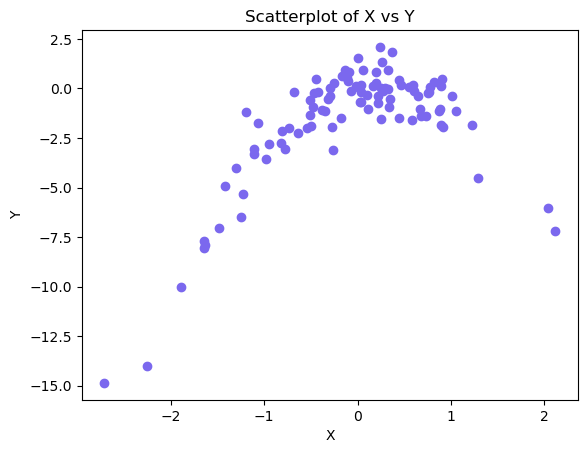

In [20]:
plt.scatter(x, y, color="mediumslateblue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show()

**(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:**

**i. Y = β0 + β1X + ε**

**ii. Y =β0 +β1X+β2X2 +ε**

**iii. Y =β0 +β1X+β2X2 +β3X3 +ε**

**iv. Y =β0 +β1X+β2X2 +β3X3 +β4X4 +ε.**

**Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y**

In [21]:
def loocv_error(x, y, degree):
    n = len(x)
    errors = np.zeros(n)

    for i in range(n):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_test = x[i].reshape(1, -1)
        y_test = y[i]

        poly = PolynomialFeatures(degree=degree, include_bias=True)
        
        X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
        X_test_poly  = poly.transform(x_test)

        model = LinearRegression().fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        errors[i] = (y_test - y_pred)**2

    return errors.mean()

In [22]:
np.random.seed(1)

cv1 = loocv_error(x, y, degree=1)  
cv2 = loocv_error(x, y, degree=2)   
cv3 = loocv_error(x, y, degree=3)
cv4 = loocv_error(x, y, degree=4)

print("LOOCV 1:", cv1.round(4))
print("LOOCV 2:", cv2.round(4))
print("LOOCV 3:", cv3.round(4))
print("LOOCV 4:", cv4.round(4))

LOOCV 1: 6.633
LOOCV 2: 1.1229
LOOCV 3: 1.3018
LOOCV 4: 1.3324


**(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?**

In [23]:
np.random.seed(999)

x2 = np.random.randn(100)
y2 = x2 - 2*(x2**2) + np.random.randn(100)

cv1b = loocv_error(x2, y2, degree=1)
cv2b = loocv_error(x2, y2, degree=2)
cv3b = loocv_error(x2, y2, degree=3)
cv4b = loocv_error(x2, y2, degree=4)

print("LOOCV 1:", cv1b.round(4))
print("LOOCV 2:", cv2b.round(4))
print("LOOCV 3:", cv3b.round(4))
print("LOOCV 4:", cv4b.round(4))

LOOCV 1: 6.3728
LOOCV 2: 0.913
LOOCV 3: 0.9059
LOOCV 4: 0.998


Los resultados si cambiaron ligeramente. Esto podría deberse a que la semilla definida si influye en los resultados

**(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.**

El modelo de grado 2 fue el que tuvo un error LOOCV menor. 

**(f) Comment on the statistical significance of the coeﬀicient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?**

In [24]:
import statsmodels.api as sm

def fit_poly_ols(x, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = sm.OLS(y, X_poly).fit()
    return model

model1 = fit_poly_ols(x, y, degree=1)
model2 = fit_poly_ols(x, y, degree=2)
model3 = fit_poly_ols(x, y, degree=3)
model4 = fit_poly_ols(x, y, degree=4)

print("Modelo grado 1:", model1.summary())
print("Modelo grado 2:", model2.summary())
print("Modelo grado 3:", model3.summary())
print("Modelo grado 4:", model4.summary())

Modelo grado 1:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        11:05:09   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247    

Si coinciden estos valores con los resultados de los incisos pasados, indicando que el modelo de grado 2 es el mejor, y no existe una necesidad de agregar grados para que este mejore, ya que, en los grados lineal, cúbico y cuadrático, los valores dieron no significativos.

**9. We will now consider the Boston housing data set, from the ISLR2 library.**

**(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.**

In [25]:
Boston = load_data("Boston")
medv = Boston['medv']
mu = medv.mean()
print("mu =", mu.round(4))

mu = 22.5328


**(b) Provide an estimate of the standard error of μˆ. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.**

In [26]:
n = len(Boston)
std_dev = Boston["medv"].std()
se_mu = std_dev / np.sqrt(n)

se_mu.round(4)

0.4089

**(c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?**

In [28]:
np.random.seed(1)

B = 1000
boot_means = np.zeros(B)

for b in range(B):
    sample = Boston["medv"].sample(n, replace=True)
    boot_means[b] = sample.mean()

se_boot = boot_means.std()
se_boot.round(4)

0.4124

Este dos resultados son prácticamente iguales, el error con bootstrap siendo ligeramente mayor al del modelo normal

**(d) Based on your bootstrap estimate from (c), provide a 95 % con- fidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).
Hint: You can approximate a 95 % confidence interval using the formula [μˆ − 2SE(μˆ), μˆ + 2SE(μˆ)].**

In [29]:
ci_boot = [mu - 2*se_boot, mu + 2*se_boot]
ci_boot

[21.708000921566942, 23.35761172665441]

**(e) Based on this data set, provide an estimate, μˆmed, for the median value of medv in the population.**

In [30]:
mu_med_hat = Boston["medv"].median()
mu_med_hat

21.2

**(f) We now would like to estimate the standard error of μˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.**

In [32]:
np.random.seed(1)
boot_meds = np.zeros(B)

for b in range(B):
    sample = Boston["medv"].sample(n, replace=True)
    boot_meds[b] = sample.median()

se_med_boot = boot_meds.std()
se_med_boot.round(4)

0.3746

Este error estándar fue menor que el error estándar de la media

**(g) Based on this data set, provide an estimate for the tenth per- centile of medv in Boston census tracts. Call this quantity μˆ0.1. (You can use the quantile() function.)**

In [33]:
mu_p10 = np.percentile(Boston["medv"].dropna(), 10)
mu_p10

12.75

**(h) Use the bootstrap to estimate the standard error of μˆ0.1. Com- ment on your findings.**

In [34]:
np.random.seed(1)
boot_p10 = np.zeros(B)

for b in range(B):
    sample = Boston["medv"].sample(n, replace=True)
    boot_p10[b] = sample.quantile(0.10)

se_p10_boot = boot_p10.std()
se_p10_boot

0.48836343024432116